1. Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
%pwd  
#import os
#print (os.getcwd())

'/content'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df =pd.read_csv(r"/content/drive/MyDrive/Mes Codes/Machine Learning/house.csv")
df.head(6)
df.shape
#df.dtypes

(545, 2)

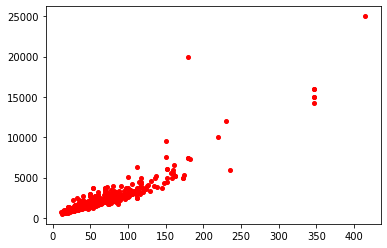

In [5]:
#Representation des données
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
plt.show()

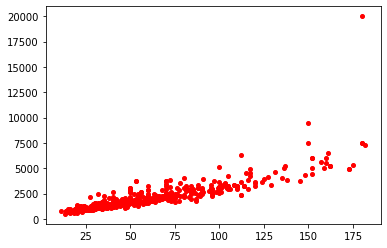

(536, 2)

In [6]:
#Limitation aux surface  <200
df = df[df['surface'] < 200]
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
plt.show()
df.shape

In [7]:
X = np.matrix([np.ones(df.shape[0]), df['surface'].values]).T
y = np.matrix(df['loyer']).T

# On effectue le calcul exact du paramètre theta
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print(theta)


[[121.60147133]
 [ 33.61347533]]


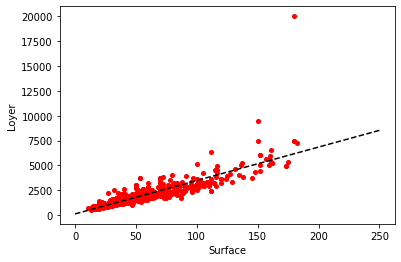

In [8]:
#Affichage du nuage des points et du modèle
plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.plot(df['surface'], df['loyer'], 'ro', markersize=4)
# On affiche la droite entre 0 et 250
plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
plt.show()

In [9]:
#predictions
theta.item(0) + theta.item(1) * 35

1298.0731080517835

In [10]:
model = linear_model.LinearRegression()
model.fit(X, y)
#model.predict(<des données de test>)
model.predict([[1,35]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[1298.07310805]])

In [11]:
model.coef_

array([[ 0.        , 33.61347533]])

In [12]:
theta

matrix([[121.60147133],
        [ 33.61347533]])

In [ ]:
model.intercept_

array([266.45460292])

## Approche Ensemble de test

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
#model.fit(X_train, y_train)
#predicted = model.predict(X_test)
#plt.plot(y_test,predicted, 'ro', c = 'r')
y_train.shape

(428, 1)

In [14]:
model.score(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.6725914906047465

In [15]:
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


0.8285656020723343

In [16]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
print("R2 : ", metrics.r2_score(y_train,model.predict(X_train)))
print("MSE : ",metrics.mean_squared_error(y_test, model.predict(X_test)))
print("RMSE_test : ", np.sqrt(metrics.mean_squared_error(y_test, model.predict(X_test))))
print("MAE : ", metrics.mean_absolute_error(y_test, model.predict(X_test)))

R2 :  0.6725914906047465
MSE :  267148.27432985336
RMSE_test :  516.8638837545659
MAE :  358.49343127979887


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [19]:
scores_model = cross_val_score(model,X,y,cv =5,scoring ='r2')
MSE = cross_val_score(model,X,y,cv =5)
MAE = cross_val_score(model,X,y,cv =5,scoring ='neg_mean_absolute_error')
print(MSE.mean())
#print(MAE)

0.6648266751433279


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

In [20]:
df.head(5)

,loyer,surface
0,1330,37
1,1400,32
2,904,26
3,955,30
4,2545,70
